# Prediction of Sales per Week 
Travail Pratique : Projet de Data Science Appliquée

Data Source : https://www.kaggle.com/datasets/mikhail1681/walmart-sales/code


In [3]:
#All the packages necessary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas


#Models
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor



import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load data 
Walmart_sales = pd.read_csv('Walmart_Sales.csv')
type(Walmart_sales)

pandas.core.frame.DataFrame

## Understand the Data

In [3]:
Walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
Walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Convert the Date column to datetime format
Walmart_sales['Date'] = pd.to_datetime(Walmart_sales['Date'], format='%d-%m-%Y')


In [6]:
# Here we can see the max, min and other information about our data
# For example we have about 2 years of data
Walmart_sales.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
# To show more information on our dataset

list_item = []
for col in Walmart_sales.columns:
    list_item.append([col, Walmart_sales[col].isna().sum(), Walmart_sales[col].nunique(), Walmart_sales[col].unique()[:5]])
desc_Walmart_sales = pd.DataFrame(data=list_item, columns='Column,Nb of Null,Distinct,Distinct Sample'.split(","))
desc_Walmart_sales


,Column,Nb of Null,Distinct,Distinct Sample
0,Store,0,45,"[1, 2, 3, 4, 5]"
1,Date,0,143,"[2010-02-05 00:00:00, 2010-02-12 00:00:00, 201..."
2,Weekly_Sales,0,6435,"[1643690.9, 1641957.44, 1611968.17, 1409727.59..."
3,Holiday_Flag,0,2,"[0, 1]"
4,Temperature,0,3528,"[42.31, 38.51, 39.93, 46.63, 46.5]"
5,Fuel_Price,0,892,"[2.572, 2.548, 2.514, 2.561, 2.625]"
6,CPI,0,2145,"[211.0963582, 211.2421698, 211.2891429, 211.31..."
7,Unemployment,0,349,"[8.106, 7.808, 7.787, 7.838, 7.742]"


In [8]:
# Convert the 'Date' column to datetime format
Walmart_sales['Date'] = pd.to_datetime(Walmart_sales['Date'], format='%d-%m-%Y')
# Extract features like year, month and WeekOfYear
if 'Date' in Walmart_sales.columns:
    Walmart_sales['Year'] = Walmart_sales['Date'].dt.year
    Walmart_sales['Month'] = Walmart_sales['Date'].dt.month #Only useful for vizualisation
    Walmart_sales['WeekOfYear'] = Walmart_sales['Date'].dt.isocalendar().week

## 📊 Exploratory Data Analysis (EDA)

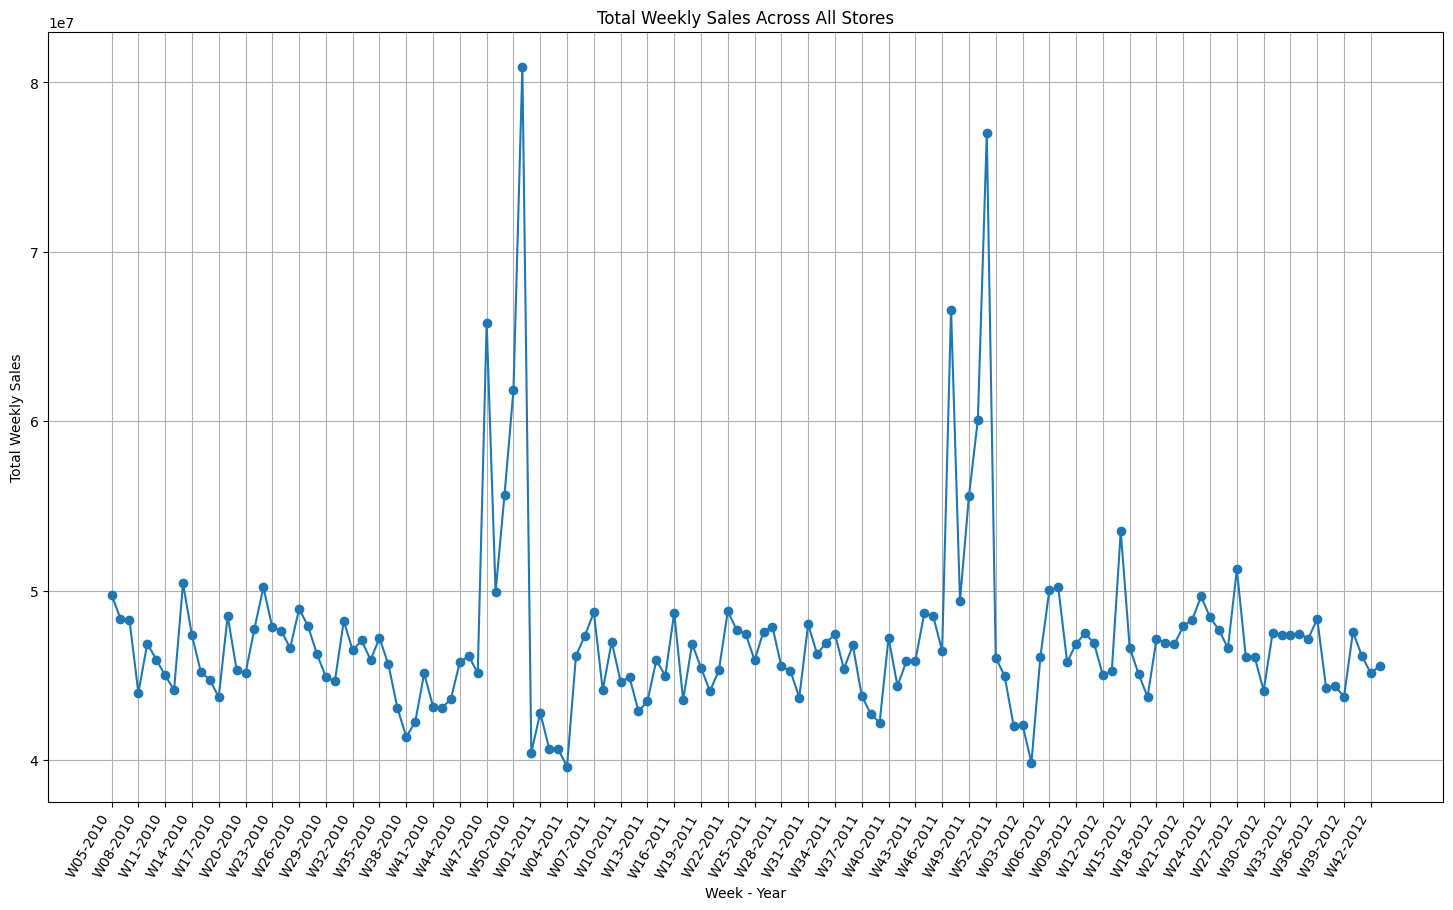

In [9]:
# Weekly sales per week 
# Convert the 'Date' column to datetime with the correct format
Walmart_sales['Date'] = pd.to_datetime(Walmart_sales['Date'], format='%d-%m-%Y')
total_sales_per_week = Walmart_sales.groupby('Date')['Weekly_Sales'].sum().reset_index()
total_sales_per_week['Week_Year'] = total_sales_per_week['Date'].dt.strftime('W%U-%Y')

# Plotting
plt.figure(figsize=(18, 10))
plt.plot(total_sales_per_week['Week_Year'], total_sales_per_week['Weekly_Sales'], marker='o')
plt.title('Total Weekly Sales Across All Stores')
plt.xlabel('Week - Year')
plt.ylabel('Total Weekly Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60, ha='right')

# Reduce the number of x-axis labels by showing every nth label
n = len(total_sales_per_week) // 40 
plt.gca().set_xticks(total_sales_per_week['Week_Year'][::n])

plt.grid(True)
plt.show()

Here we observe a few pics, both starting on week 47. We don't have data for week 47 in 2012 yet.

In [10]:
# One-hot encode categorical variables
# I tried to convert the 'Month' column to a string type to treat it as categorical
# The goal was to test if the values are better at the end but it didn't make a difference
Walmart_sales_encoded = pd.get_dummies(Walmart_sales, drop_first=True)

In [11]:
# Group sales by year and month to analyze seasonality
monthly_sales = Walmart_sales_encoded.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

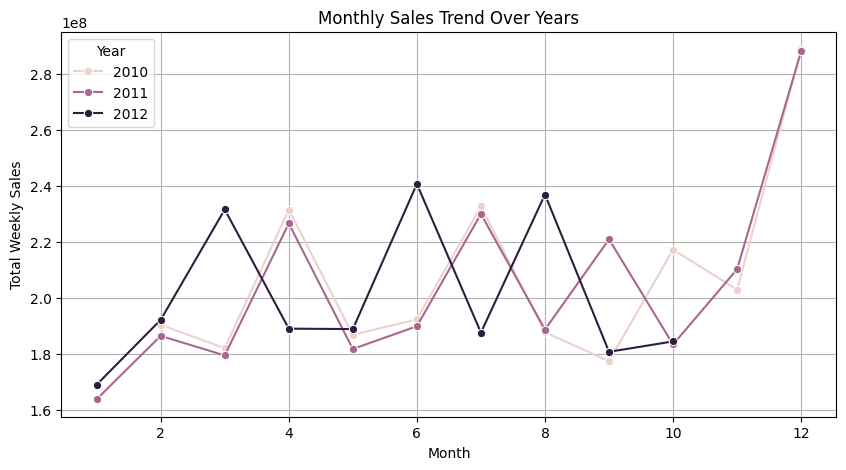

In [12]:
# Plot: Monthly Sales Trend Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

Seems as though the pics are not on the same month in 2010 and 2011 and in 2012. No real trend on  the months. Maybe it would be good to remove it from the model.


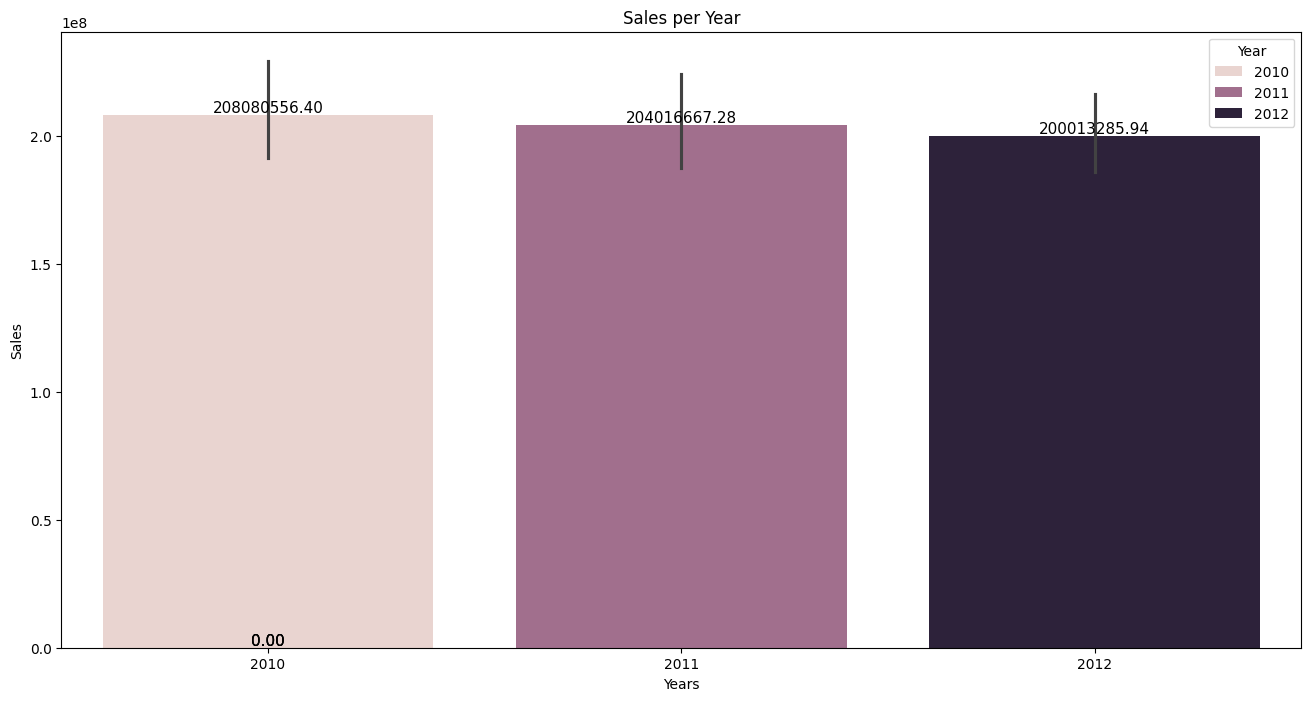

In [13]:
# Plot sales per year 
plt.figure(figsize=(16,8))
sns.barplot(data = monthly_sales, x = 'Year', y = 'Weekly_Sales', hue='Year')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales per Year')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')
    
plt.show()

Here it seems as there is a decrease in sales in 2012 but data from december 2012 is missing which is when there was one of the pics in sales.

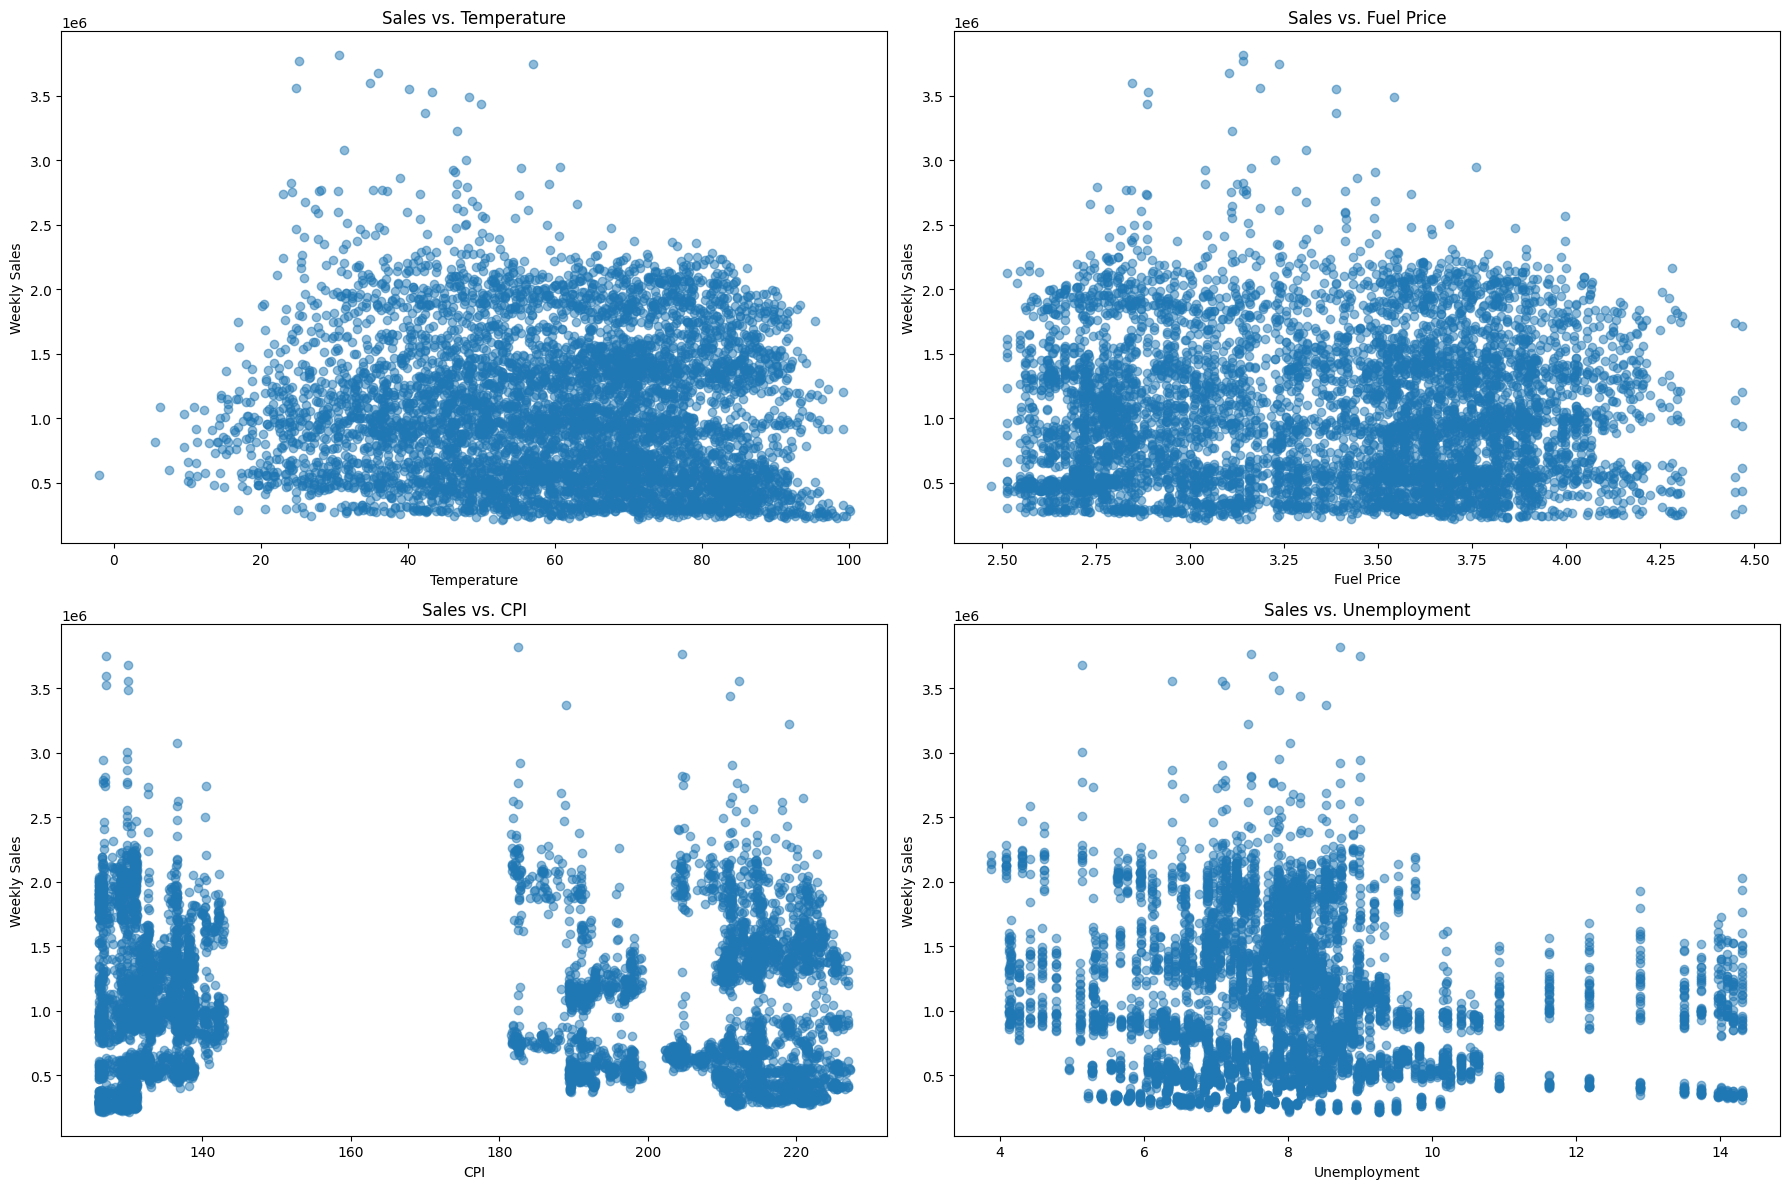

In [14]:
# Set up the figure and axes for 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Sales vs Temperature
axs[0, 0].scatter(Walmart_sales_encoded['Temperature'], Walmart_sales_encoded['Weekly_Sales'], alpha=0.5)
axs[0, 0].set_title('Sales vs. Temperature')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Weekly Sales')

# Plot 2: Sales vs Fuel Price
axs[0, 1].scatter(Walmart_sales_encoded['Fuel_Price'], Walmart_sales_encoded['Weekly_Sales'], alpha=0.5)
axs[0, 1].set_title('Sales vs. Fuel Price')
axs[0, 1].set_xlabel('Fuel Price')
axs[0, 1].set_ylabel('Weekly Sales')

# Plot 3: Sales vs CPI
axs[1, 0].scatter(Walmart_sales_encoded['CPI'], Walmart_sales_encoded['Weekly_Sales'], alpha=0.5)
axs[1, 0].set_title('Sales vs. CPI')
axs[1, 0].set_xlabel('CPI')
axs[1, 0].set_ylabel('Weekly Sales')

# Plot 4: Sales vs Unemployment
axs[1, 1].scatter(Walmart_sales_encoded['Unemployment'], Walmart_sales_encoded['Weekly_Sales'], alpha=0.5)
axs[1, 1].set_title('Sales vs. Unemployment')
axs[1, 1].set_xlabel('Unemployment')
axs[1, 1].set_ylabel('Weekly Sales')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


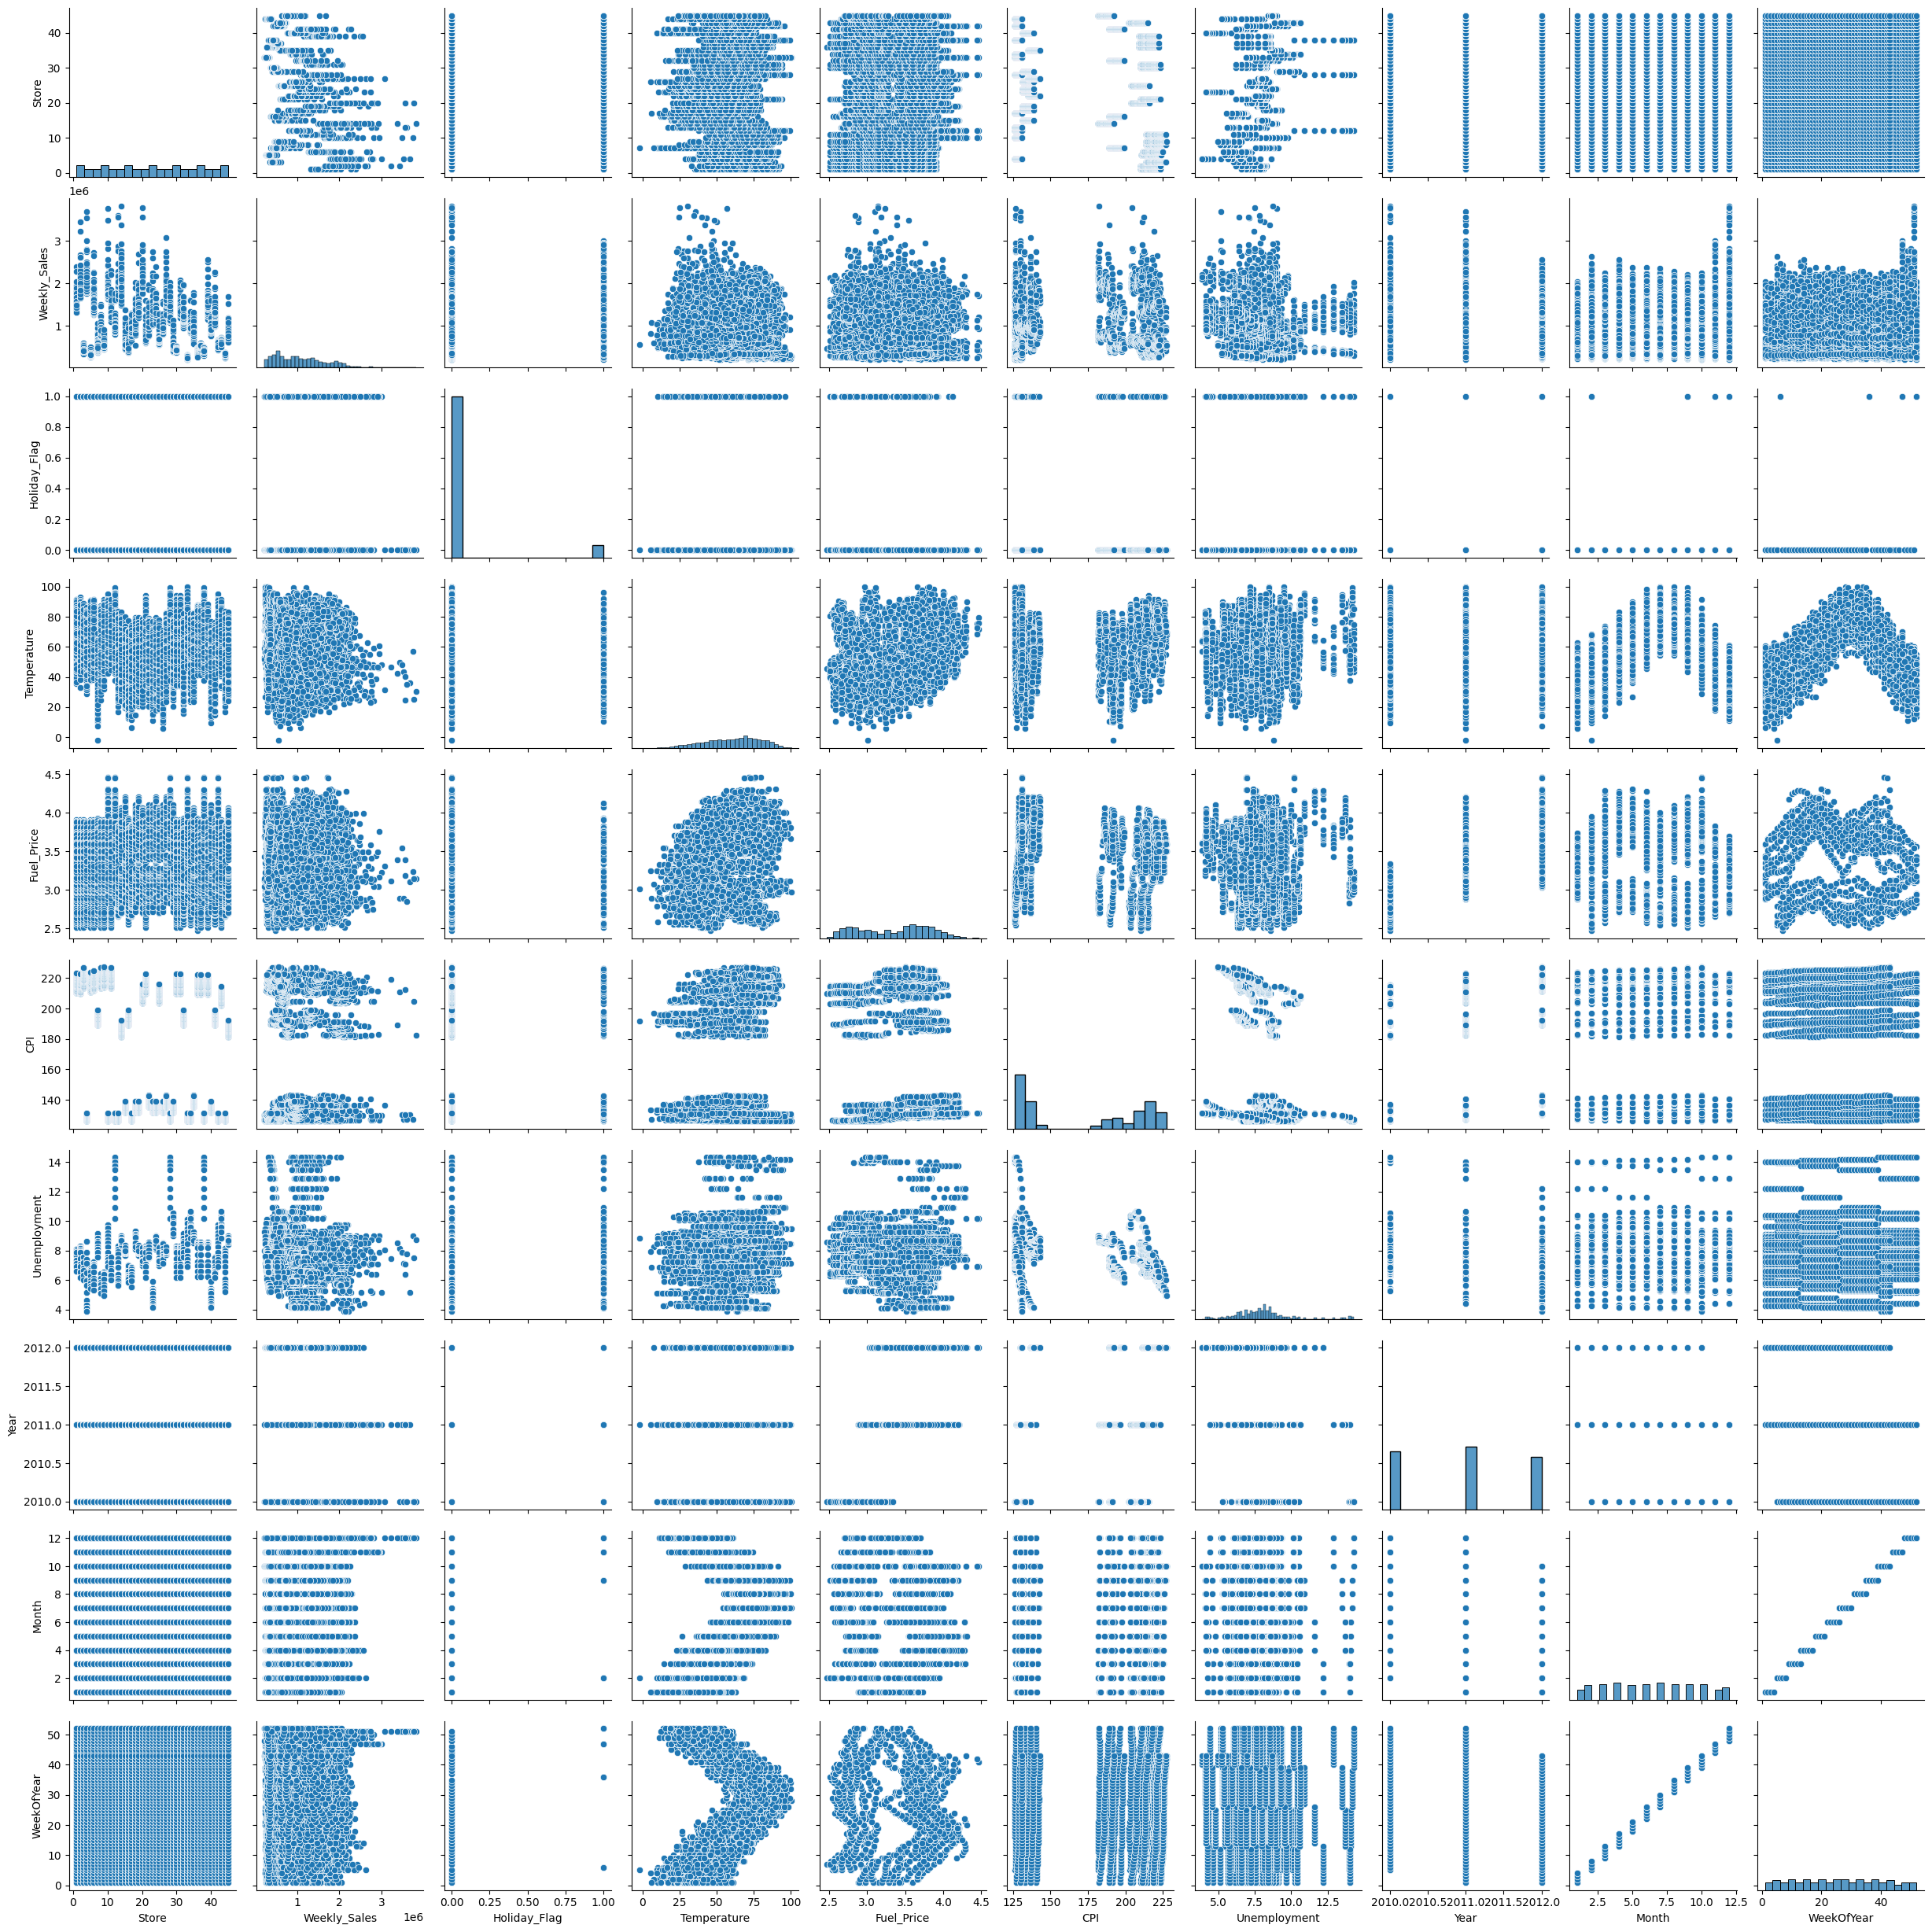

In [15]:
# Plot to see how all the features interact with eachother
sns.pairplot(Walmart_sales)

In [16]:
# Creates correlation matrix
correlation_matrix = Walmart_sales_encoded.drop(columns=['Date', 'Store']).corr()


<Axes: >

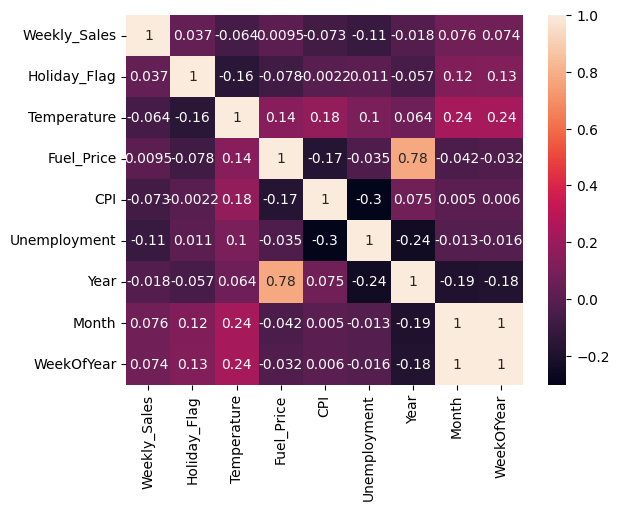

In [17]:
# Heatmap to visualise the correlation
sns.heatmap(correlation_matrix, annot=True) 

There is very weak correlation between the features. This is positive because the features are impacting the prediction in different ways and no two features are giving information on the same thing.

# Model 1 : Linear Regression

In [18]:
# Keeps all the columns except : Weekly_Sales, Fuel_Price and Date
# After one first iteration, I will remove Month
X = Walmart_sales_encoded.drop(['Weekly_Sales','Fuel_Price','Date','Month'],axis='columns')

# Keep only column : 'Price'
y = Walmart_sales_encoded['Weekly_Sales']

In [19]:
# Here we split the data into test or train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Function to print evaluation metrics for regression model performance
# Parameters:
# true: Array-like or list of true target values
# predicted: Array-like or list of predicted values from the model

#Metrics calculated and printed:
# Mean Absolute Error (MAE): The average of the absolute differences between true and predicted values
# Mean Squared Error (MSE): The average of the squared differences between true and predicted values
# Root Mean Squared Error (RMSE): The square root of the mean squared error, giving error in the same units as the target
# R-squared (R2 Square): The proportion of variance in the dependent variable that is predictable from the independent variable


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)  # Calculate MAE
    mse = metrics.mean_squared_error(true, predicted)   # Calculate MSE
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))  # Calculate RMSE
    r2_square = metrics.r2_score(true, predicted)  # Calculate R2 Square
    print('MAE:', mae)  
    print('MSE:', mse)  
    print('RMSE:', rmse)  
    print('R2 Square', r2_square)  
    print('__________________________________')  

# Function to return evaluation metrics for regression model performance
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)  # Calculate MAE
    mse = metrics.mean_squared_error(true, predicted)   # Calculate MSE
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))  # Calculate RMSE
    r2_square = metrics.r2_score(true, predicted)  # Calculate R2 Square
    return mae, mse, rmse, r2_square 

## Preparing the Data

In [21]:
# Standardisation
# The features in X_train and X_test are scaled so that they have a mean of 0 and a standard deviation of 1
# This is good for improving the performance of certain machine learning algorithms 
# but it changes the scale of the coefficients in linear models so it needs to be corrected later on


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [22]:
# Model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

## 📈 Evaluation of the Model

In [23]:
# Coefficient that is not yet correct
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Store,-193995.904705
Holiday_Flag,14404.261623
Temperature,-22588.602685
CPI,-89284.637479
Unemployment,-44300.010440
Year,-4727.173500
WeekOfYear,46465.946429


In [24]:
# To interpret the coefficients in the original scale of the data
# we need to reverse the standardization by dividing each coefficient by the standard deviation of its feature 
# and adjusting the intercept accordingly
interpret_df = pd.DataFrame(coeff_df["Coefficient"]/pipeline.named_steps['std_scalar'].scale_)

interpret_df

,Coefficient
Store,-14926.011697
Holiday_Flag,56982.849168
Temperature,-1225.545319
CPI,-2276.669421
Unemployment,-23603.517818
Year,-5919.348188
WeekOfYear,3283.777947



- **Store**: Holding all other variables constant, an increase of 1 of the number of the Store is associated with a decrease of $1 4926 in the dependent variable.
- **Holiday_Flag**: Holding all other variables constant, a Holiday_Flag value of 1 (indicating a holiday) is associated with an increase of $56 983 in the dependent variable.
- **Temperature**: Holding all other variables constant, an increase of 1 unit in Temperature is associated with a decrease of $1 226 in the dependent variable.
- **CPI (Consumer Price Index)**: Holding all other variables constant, an increase of 1 unit in CPI is associated with a decrease of $2 277 in the dependent variable.
- **Unemployment**: Holding all other variables constant, an increase of 1 unit in Unemployment is associated with a decrease of $23 604 in the dependent variable.
- **Year**: Holding all other variables constant, an increase of 1 year is associated with a decrease of $5'919 in the dependent variable.
- **WeekOfYear**: Holding all other variables constant, an increase of 1 week in the WeekOfYear is associated with a increase of $3 284 in the dependent variable.



---> These variables don't really make sense, since there is a decrease per year but an increase of week of the year. 
Let's see how well the model predicts the weekly sales.


## Prediction of the Model

In [25]:
pred = lin_reg.predict(X_test)

In [26]:
#Visual performance of the model
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [27]:
# The kernel density estimate (KDE) plot of the error values (the difference between the actual values and the predicted values)
# The plot visualizes the distribution of errors, helping to determine how well the model's predictions match the actual values
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [28]:
# calculates and displays descriptive statistics of the absolute error values (the absolute differences between the actual values and the predicted values)
# The goal is to help us understand the distribution and magnitude of the prediction errors
abs(y_test-pred).describe()

count    1.931000e+03
mean     4.305364e+05
std      2.912772e+05
min      4.033388e+01
25%      2.070071e+05
50%      3.808273e+05
75%      6.265057e+05
max      2.613349e+06
Name: Weekly_Sales, dtype: float64

The sales data is quite variable, with a big difference between the minimum and maximum values.

## Evaluation

In [29]:
# The function evaluate(y_test, test_pred) is used to compute performance metrics
# Mentioned above

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 430536.4496857841
MSE: 270160082675.04498
RMSE: 519769.2590708352
R2 Square 0.1550120730884469
__________________________________
Train set evaluation:
_____________________________________
MAE: 429111.830180865
MSE: 271977172356.4874
RMSE: 521514.3069528269
R2 Square 0.14422272981215134
__________________________________


1. Model Fit (R² Score):
The R² scores for both the test set (0.16) and the training set (0.14) are pretty low. 
This means our model is only explaining about 15% of the variance in weekly sales, which isn't great. 
It looks like the model isn't really picking up on the underlying patterns in the data.

2. Error Metrics (MAE, MSE, RMSE):
We're seeing quite large error values (MAE, MSE, RMSE), especially considering typical sales figures. 
This suggests that the model's predictions are way off from the actual sales numbers.
The errors are similar for both the training and test sets, so the model isn't overfitting or underfitting. 
However, the overall poor performance might mean that the model isn't complex enough, or we're missing some important features.


# Model 2 : Random Forest Regressor 

Random Forest is a non-linear model that can capture complex relationships between features and the target variable. This means it's probably a better model for this dataset as the sales don't evolve in an increasing matter and is impacted by various factors like promotions (not available in our data), seasonality, holidays, and economic conditions.

In [30]:
# Same thing as before but with Random Forest Regressor
# fit() fits the model to the training data allowing it to learn how to predict the target variable based on the features
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 63013.57925510135
MSE: 13431508522.366365
RMSE: 115894.3852063868
R2 Square 0.9579898613102639
__________________________________
Train set evaluation:
_____________________________________
MAE: 21910.19248494221
MSE: 1594124449.615087
RMSE: 39926.488070140695
R2 Square 0.994984080987344
__________________________________


1. Model Fit (R² Score):
The R² scores look really strong here—about 0.958 on the test set and 0.995 on the training set. This means the model is explaining around 96% of the variance in weekly sales on the test data, and an even higher percentage on the training data. It’s doing a great job of capturing the underlying patterns.
2. Error Metrics (MAE, MSE, RMSE):
The error values (MAE, MSE, RMSE) are much lower compared to previous results, especially on the training set. This suggests that the model's predictions are quite close to the actual sales figures. The difference in errors between the training and test sets shows that while the model is very accurate on the training data, it’s still performing well on unseen data. Overall, this is much better !!

# Model 3 : Gradient Boosting Regressor 

Since the gradient boosting regressor model is capable of capturing complex relationships between features and the weekly sales, it is worth trying.

In [31]:
# Initialize the Gradient Boosting Regressor with default parameters 
gb_reg = GradientBoostingRegressor()

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

# Predict on the test and training data
test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

# Evaluate the model on the test set
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

# Evaluate the model on the training set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Store the results in a DataFrame
results_df_3 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

# Concatenate the new results with the previous results DataFrame
results_df = pd.concat([results_df, results_df_3], ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 131366.06492513765
MSE: 31102508587.98369
RMSE: 176359.03319077162
R2 Square 0.9027197356719763
__________________________________
Train set evaluation:
_____________________________________
MAE: 128743.83549454226
MSE: 29448702168.83604
RMSE: 171606.2416371737
R2 Square 0.9073395398067114
__________________________________


In [32]:
# Initialize the GradientBoostingRegressor with 1000 trees to see if we obtain better results.
gb_reg = GradientBoostingRegressor(n_estimators=1000)

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Make predictions on the test and training sets
test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

# Evaluate the model on the test and training sets
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Store the results in a DataFrame
results_df_3 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

# Combine with previous results
results_df = pd.concat([results_df, results_df_3], ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 57816.52781446973
MSE: 8899076798.07783
RMSE: 94334.9182332705
R2 Square 0.9721660861938688
__________________________________
Train set evaluation:
_____________________________________
MAE: 38100.708413109794
MSE: 2960529473.4614363
RMSE: 54410.74777524599
R2 Square 0.9906846820666674
__________________________________


The 2nd Gradient Boosting Regressor performs better on all metrics : R², MAE, MSE, and RMSE, on both the test and training sets. This shows that it not only fits the training data better but also generalizes more effectively to the test data, making it the superior model in this case.

In the second one 1000 trees are created. A larger number of trees can lead to better performance but also increases computational cost and the risk of overfitting. Here, based on the evaluation metrics, the slight difference in performance between the train and test sets is normal and indicates that the model is not overfitting.

# Conclusion

Model Conclusion: 

Test Set Performance: The Gradient Boosting Regressor does a better job than the Random Forest Regressor on the test set in every metric—MAE, MSE, RMSE, and R². This means it makes more accurate predictions and handles new data better.

Train Set Performance: The Random Forest Regressor is a bit better on the training set with lower MAE, MSE, and RMSE, but this might just mean it’s fitting the training data a little too well, which could lead to slight overfitting.

So the best match is the Gradient Boosting Regressor.

**General Conclusion**

1. Understanding the Model Results:
The Gradient Boosting Regressor turned out to be a strong performer with an R² score of about 0.97 on the test set. This means the model explains 97% of the changes in weekly sales. The error metrics (MAE, MSE, RMSE) are also pretty low, especially on the test data, meaning the predictions are close to the actual sales numbers.
Comparison with Other Models:
When I compared it with the Random Forest Regressor, the Gradient Boosting model came out on top, especially in handling new, unseen data, as shown by its lower errors and higher R² score. The Random Forest did slightly better on the training set, but that might mean it’s too tailored to that data and not as flexible with new data.

2. Why This Matters for the Main Problem:
The goal was to predict weekly sales accurately, which is important for things like managing inventory, planning finances, and making strategic decisions. The Gradient Boosting Regressor’s strong performance is a good sign that it can be trusted for making reliable sales predictions.

Limitations:
While the model does a great job, it’s important to remember that there might be other factors not included in the model (like economic shifts or sudden market changes) that could affect sales. Going forward, it could be worth adding more features or testing the model over different time periods to make sure it stays reliable and with recent data. 